# Milestone Project: Food Vision Big

In [1]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_histories

## Use TensorFlow Datasets

In [2]:
import tensorflow_datasets as tfds

In [3]:
datasets_list = tfds.list_builders()
datasets_list

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'd4rl_adroit_door',
 'd4rl_adroit_hammer',
 'd4rl_adroit_pen',
 'd4rl_adroit_relocate',
 'd4rl_mujoco_ant',
 'd4

In [4]:
(train_data, test_data), ds_info = tfds.load(
    name="food101",
    split=["train", "validation"],
    shuffle_files=True,
    as_supervised=True, # data gets returned in tuple format
    with_info=True
)


Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...: 100%|██████████| 1/1 [03:51<00:00, 231.29s/ url]

Dl Completed...: 100%|██████████| 1/1 [20:24<00:00, 1224.04s/ url]


Dataset food101 downloaded and prepared to C:\Users\alexm\tensorflow_datasets\food101\2.0.0. Subsequent calls will reuse this data.


In [5]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=101),
})

In [6]:
class_names = ds_info.features["label"].names
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

## Exploring the Food101 dataset

In [30]:
train_one_sample = train_data.take(1)
train_one_sample

<TakeDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [31]:
for image, label in train_one_sample:
    print(f"""
    Image shape: {image.shape}
    Image datatype: {image.dtype},
    Target class form Food101 (tensor form): {label}
    Class name (str form): {class_names[label.numpy()]}
    """)


    Image shape: (512, 512, 3)
    Image datatype: <dtype: 'uint8'>,
    Target class form Food101 (tensor form): 23
    Class name (str form): churros
    


In [32]:
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[189, 165, 121],
        [185, 161, 117],
        [181, 157, 113],
        ...,
        [111,  72,  33],
        [103,  64,  25],
        [ 94,  55,  16]],

       [[186, 162, 118],
        [183, 159, 115],
        [180, 156, 112],
        ...,
        [122,  83,  40],
        [113,  74,  31],
        [105,  66,  23]],

       [[180, 156, 112],
        [178, 154, 110],
        [177, 153, 109],
        ...,
        [132,  94,  45],
        [124,  87,  35],
        [120,  83,  31]],

       ...,

       [[207, 204, 159],
        [205, 201, 154],
        [204, 196, 147],
        ...,
        [231, 225, 191],
        [231, 225, 189],
        [231, 226, 188]],

       [[207, 204, 159],
        [205, 201, 154],
        [204, 196, 147],
        ...,
        [230, 224, 190],
        [230, 224, 188],
        [229, 223, 187]],

       [[206, 203, 158],
        [204, 200, 153],
        [203, 195, 146],
        ...,
        [229, 223, 18

In [33]:
import tensorflow as tf

tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

### Plot an image from TensorFlow Datasets

Text(0.5, 1.0, 'churros')

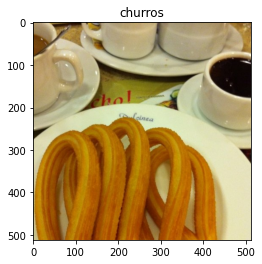

In [34]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# img = mpimg.imread(image)
plt.imshow(image)
plt.title(class_names[label.numpy()])

## Create preprocessing functions

In [40]:
def preprocess_img(image, label, img_shape=224):
    image = tf.image.resize(image, [img_shape, img_shape])
    # image = image/255.
    return tf.cast(image, tf.float32), label


In [41]:
preprocessed_img = preprocess_img(image, label)[0]
print(f"Image before preprocessing:\n {image[:2]}..., \nShape: {image.shape},\nDatatype:{image.dtype}")
print(f"Image before preprocessing:\n {preprocessed_img[:2]}..., \nShape: {preprocessed_img.shape},\nDatatype:{preprocessed_img.dtype}")

Image before preprocessing:
 [[[189 165 121]
  [185 161 117]
  [181 157 113]
  ...
  [111  72  33]
  [103  64  25]
  [ 94  55  16]]

 [[186 162 118]
  [183 159 115]
  [180 156 112]
  ...
  [122  83  40]
  [113  74  31]
  [105  66  23]]]..., 
Shape: (512, 512, 3),
Datatype:<dtype: 'uint8'>
Image before preprocessing:
 [[[184.91327  160.91327  116.91326 ]
  [180.35715  156.35715  112.35714 ]
  [183.71428  160.71428  118.71429 ]
  ...
  [147.5915   108.66289   69.08129 ]
  [123.576454  84.576454  44.198887]
  [106.44359   67.44359   25.872158]]

 [[174.66837  150.66837  106.668365]
  [175.14285  151.14285  107.14286 ]
  [177.80103  153.22958  112.015305]
  ...
  [155.61722  119.545784  68.443695]
  [145.1989   108.19381   53.423363]
  [134.37747   98.30605   40.73462 ]]]..., 
Shape: (224, 224, 3),
Datatype:<dtype: 'float32'>


## Batch & Prepare Datasets

In [44]:
# Map preprocessing function to training (and parallelize)
train_data = train_data.map(
    map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE
)

# Shuffle train_data and turn it into batches and prefetch it (load it faster)
train_data = (
    train_data.shuffle(buffer_size=1000)
    .batch(batch_size=32)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

# Map preprocessing function to test data
test_data = (
    (test_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE))
    .batch(32)
    .prefetch(tf.data.AUTOTUNE)
)


In [45]:
train_data, test_data

(<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>,
 <PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>)

# Create modelling callbacks

In [46]:
from helper_functions import create_tensorboard_callback

checkpoint_path = "model_food_vision_checkpoints/cp.ckpt"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path,
    monitor="val_accuracy",
    save_best_only=True,
    save_weights_only=True,
    verbose=0,
)


# Setup mixed precision training

In [47]:
# Turn on mixed precision training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16")


INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 2070, compute capability 7.5


INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 2070, compute capability 7.5


## Build feature extraction model

In [48]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create base model
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create functional model
inputs = layers.Input(shape=input_shape, name="input_layer")

x = base_model(inputs, training=False)
x = layers.GlobalAvgPool2D()(x)
x = layers.Dense(len(class_names))(x)
outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32_layer")(
    x
)
model = tf.keras.Model(inputs, outputs)


# Compile the model
model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"],
)


In [50]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 101)               129381    
_________________________________________________________________
softmax_float32_layer (Activ (None, 101)               0         
Total params: 4,178,952
Trainable params: 129,381
Non-trainable params: 4,049,571
_________________________________________________________________


In [62]:
for layer in model.layers[1].layers:
    print(layer.name, layer.dtype)

input_1 float32
rescaling float32
normalization float32
stem_conv_pad float32
stem_conv float32
stem_bn float32
stem_activation float32
block1a_dwconv float32
block1a_bn float32
block1a_activation float32
block1a_se_squeeze float32
block1a_se_reshape float32
block1a_se_reduce float32
block1a_se_expand float32
block1a_se_excite float32
block1a_project_conv float32
block1a_project_bn float32
block2a_expand_conv float32
block2a_expand_bn float32
block2a_expand_activation float32
block2a_dwconv_pad float32
block2a_dwconv float32
block2a_bn float32
block2a_activation float32
block2a_se_squeeze float32
block2a_se_reshape float32
block2a_se_reduce float32
block2a_se_expand float32
block2a_se_excite float32
block2a_project_conv float32
block2a_project_bn float32
block2b_expand_conv float32
block2b_expand_bn float32
block2b_expand_activation float32
block2b_dwconv float32
block2b_bn float32
block2b_activation float32
block2b_se_squeeze float32
block2b_se_reshape float32
block2b_se_reduce float3

In [63]:
history_101_feature_extract = model.fit(
    train_data,
    epochs=3,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=int(0.15 * len(test_data)),
    callbacks=[
        create_tensorboard_callback(
            "training_logs", "efficientnetb0_101_all_data_feature_extract"
        ),
        model_checkpoint,
    ],
)


Saving TensorBoard log files to: training_logs/efficientnetb0_101_all_data_feature_extract/20210816-133143
Epoch 1/3


C:\ProgramData\Anaconda3\envs\general_env\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


2368/2368 [==============================] - 124s 47ms/step - loss: 1.8224 - accuracy: 0.5571 - val_loss: 1.2319 - val_accuracy: 0.6753


Epoch 2/3
2368/2368 [==============================] - 113s 47ms/step - loss: 1.2924 - accuracy: 0.6661 - val_loss: 1.1247 - val_accuracy: 0.7018


Epoch 3/3
2368/2368 [==============================] - ETA: 0s - loss: 1.1416 - accuracy: 0.7026

In [ ]:
results_feature_extractor = model.evaluate(test_data)
results_feature_extractor